In [20]:
#Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or 
#street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?


import types
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


df_data_1 = pd.read_csv('./NYC311data.csv')
df_data_1.head()


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-01-28T20:26:11.000,45492325,HEAT/HOT WATER,10462.0,2040 BRONXDALE AVENUE,BRONXDALE AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.850795,-73.866537,NaN,RESIDENTIAL BUILDING,Open
1,2020-01-28T15:57:56.000,45493601,UNSANITARY CONDITION,11368.0,55-02 98 STREET,98 STREET,ADDRESS,Corona,The following complaint conditions are still o...,QUEENS,40.738846,-73.862785,NaN,RESIDENTIAL BUILDING,Open
2,2020-01-28T04:49:03.000,45494360,HEAT/HOT WATER,11225.0,181 HAWTHORNE STREET,HAWTHORNE STREET,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.657592,-73.954469,2020-01-28T21:37:27.000,RESIDENTIAL BUILDING,Closed
3,2020-01-28T18:07:16.000,45493438,PLUMBING,10454.0,514 EAST 138 STREET,EAST 138 STREET,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.807416,-73.918919,NaN,RESIDENTIAL BUILDING,Open
4,2020-01-28T14:10:04.000,45492347,HEAT/HOT WATER,10463.0,2800 BAILEY AVENUE,BAILEY AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.873356,-73.905554,NaN,RESIDENTIAL BUILDING,Open


In [6]:
# print the dimensions of the dataframe
print(df_data_1.shape)

# In Question 1, we found that HEAT/HOT Water is the most occurred complaint type. We will create a new dataset containing complaint_type, 
# borough, zip code and street. 

df_selected = df_data_1[["complaint_type", "borough", "street_name", "incident_zip"]]
df_selected.head()

(1000000, 15)


,complaint_type,borough,street_name,incident_zip
0,HEAT/HOT WATER,BRONX,BRONXDALE AVENUE,10462.0
1,UNSANITARY CONDITION,QUEENS,98 STREET,11368.0
2,HEAT/HOT WATER,BROOKLYN,HAWTHORNE STREET,11225.0
3,PLUMBING,BRONX,EAST 138 STREET,10454.0
4,HEAT/HOT WATER,BRONX,BAILEY AVENUE,10463.0


In [9]:
#check if there are NaN variables
df_selected.isnull().sum()

# drop all the complaint_types except Heat/HOT Water
df_selected = df_selected[df_selected.complaint_type == "HEAT/HOT WATER"].dropna()
df_selected.head()


,complaint_type,borough,street_name,incident_zip
0,HEAT/HOT WATER,BRONX,BRONXDALE AVENUE,10462.0
2,HEAT/HOT WATER,BROOKLYN,HAWTHORNE STREET,11225.0
4,HEAT/HOT WATER,BRONX,BAILEY AVENUE,10463.0
5,HEAT/HOT WATER,BROOKLYN,BEDFORD AVENUE,11225.0
6,HEAT/HOT WATER,BROOKLYN,BEVERLY ROAD,11226.0


In [10]:
df_selected.isnull().sum()


complaint_type    0
borough           0
street_name       0
incident_zip      0
dtype: int64

In [22]:
# group complaint_type by borough and apply sum() function 
df_borough = df_selected.groupby('borough').sum()
df_borough.head()

,incident_zip
borough,
BRONX,355454821.0
BROOKLYN,332127940.0
MANHATTAN,231794819.0
QUEENS,168919381.0
STATEN ISLAND,9253835.0


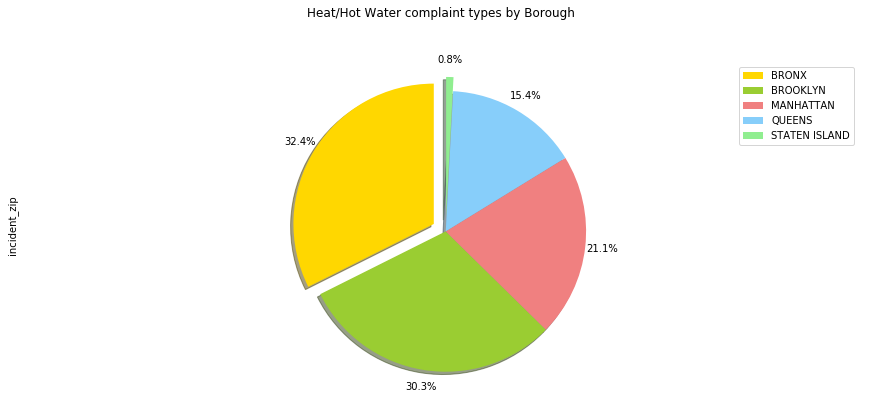

In [26]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
explode_list = [0.1, 0, 0, 0, 0.1] # ratio for each continent with which to offset each wedge.

df_borough['incident_zip'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Heat/Hot Water complaint types by Borough', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_borough.index, loc='upper right') 

plt.show()

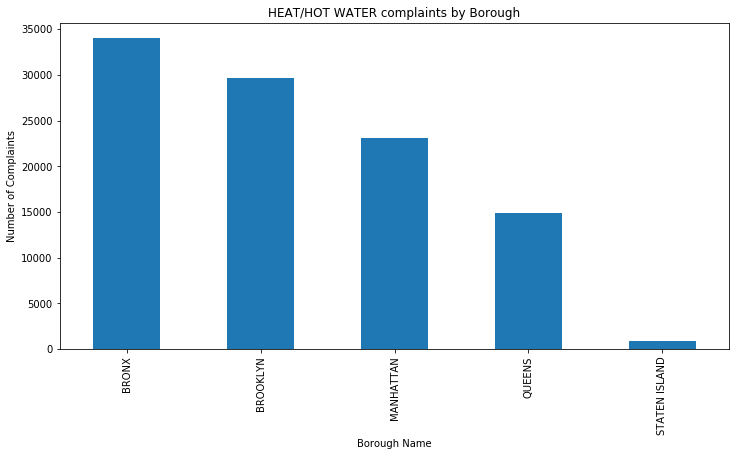

In [28]:
# To plot total number of Heat/Hot Water complaints by borough:
df_selected["borough"].value_counts().plot(kind='bar', figsize=(12, 6))

plt.xlabel('Borough Name') # add to x-label to the plot
plt.ylabel('Number of Complaints') # add y-label to the plot
plt.title('HEAT/HOT WATER complaints by Borough') # add title to the plot

plt.show()

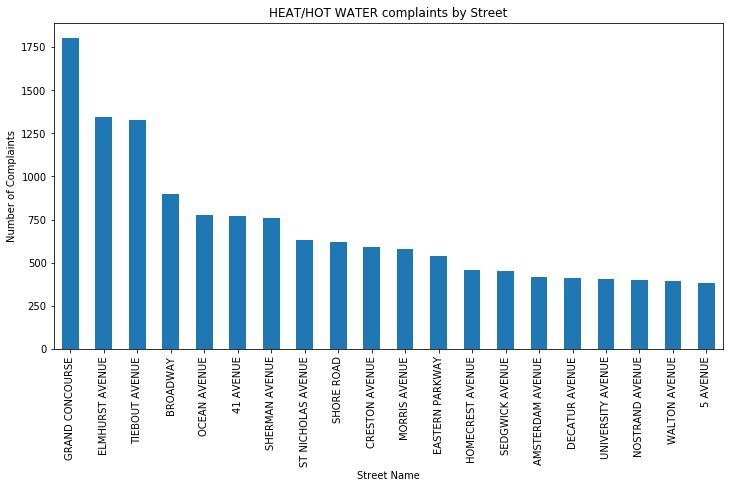

In [30]:
# To determine the total number of complaints at the Street level:
df_selected["street_name"].value_counts().head(20).plot(kind='bar', figsize=(12, 6))

plt.xlabel('Street Name') # add to x-label to the plot
plt.ylabel('Number of Complaints') # add y-label to the plot
plt.title('HEAT/HOT WATER complaints by Street') # add title to the plot
plt.show()

In [31]:
# Grand Concourse is the street where most complaints occurred, To find Grand Concourse is in which Borough:
df_selected.loc[df_selected['street_name'] == "GRAND CONCOURSE"].head()

,complaint_type,borough,street_name,incident_zip
69,HEAT/HOT WATER,BRONX,GRAND CONCOURSE,10468.0
73,HEAT/HOT WATER,BRONX,GRAND CONCOURSE,10453.0
75,HEAT/HOT WATER,BRONX,GRAND CONCOURSE,10457.0
126,HEAT/HOT WATER,BRONX,GRAND CONCOURSE,10458.0
271,HEAT/HOT WATER,BRONX,GRAND CONCOURSE,10452.0


In [ ]:
#Conclusion:
#Severely affected borough with Heat/Hot Water complaints is Bronx.
#Grand Concourse is the street in Bronx where most complaints occurred.